In [1]:
!pip install deep_autoviml

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
LLB = LabelEncoder()
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.69
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [3]:
datapath = '/content/'
filename = 'train.csv'
sep = ','
train_datafile = datapath+filename
target = 'Survived'

In [4]:
train = pd.read_csv(train_datafile, header=0, sep=sep)
print(train.shape)
train.head(1)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [5]:
filename = 'test.csv'
url = datapath + filename
test = pd.read_csv(url, header=0, sep=sep)
#train, test = split_data_n_ways(train, target, n_splits=2)
print(train.shape, test.shape)
test.head(1)

(891, 12) (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [6]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "taxi"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = 

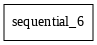


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.3026315789473684}
    original datasize = 892, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 1000
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting validat

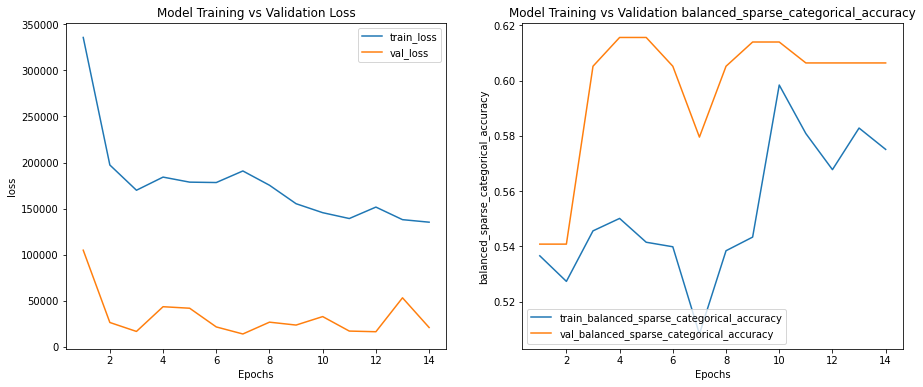

Time taken to train model (in mins) = 1
    Stopped epoch = 4
Held out data actuals shape: (96,)
    samples from label: [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

Held out predictions shape:(96,)
    Sample predictions: [1 1 0 1 0 0 0 0 0 1]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Survived
#################################################################


    Accuracy          = 65.6%
    Balanced Accuracy = 60.9%
    Precision         = 63.6%
    Average Precision = 64.9%
    Recall            = 35.9%
    F1 Score          = 45.9%
    ROC AUC           = 51.1%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 8.7091794e-05
    set learning rate using best model: 8.7091794e-05
    max epochs for training = 4

Model not being saved since save_model_flag set to False...
6157

Saving vocab dictionary using pickle in taxi/auto/model_2021_11_03-06_25_05/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in taxi/auto/model_2021_11_03-06_25_05/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in taxi/auto/model_2021_11_03-06_25_05/artifacts/var_df.pickle...will take time...
    Saved pickle file in taxi/auto/model_2021_11_03-06_25_05/artifacts/var_df.pickle

Deep_Auto_ViML completed. Total time taken

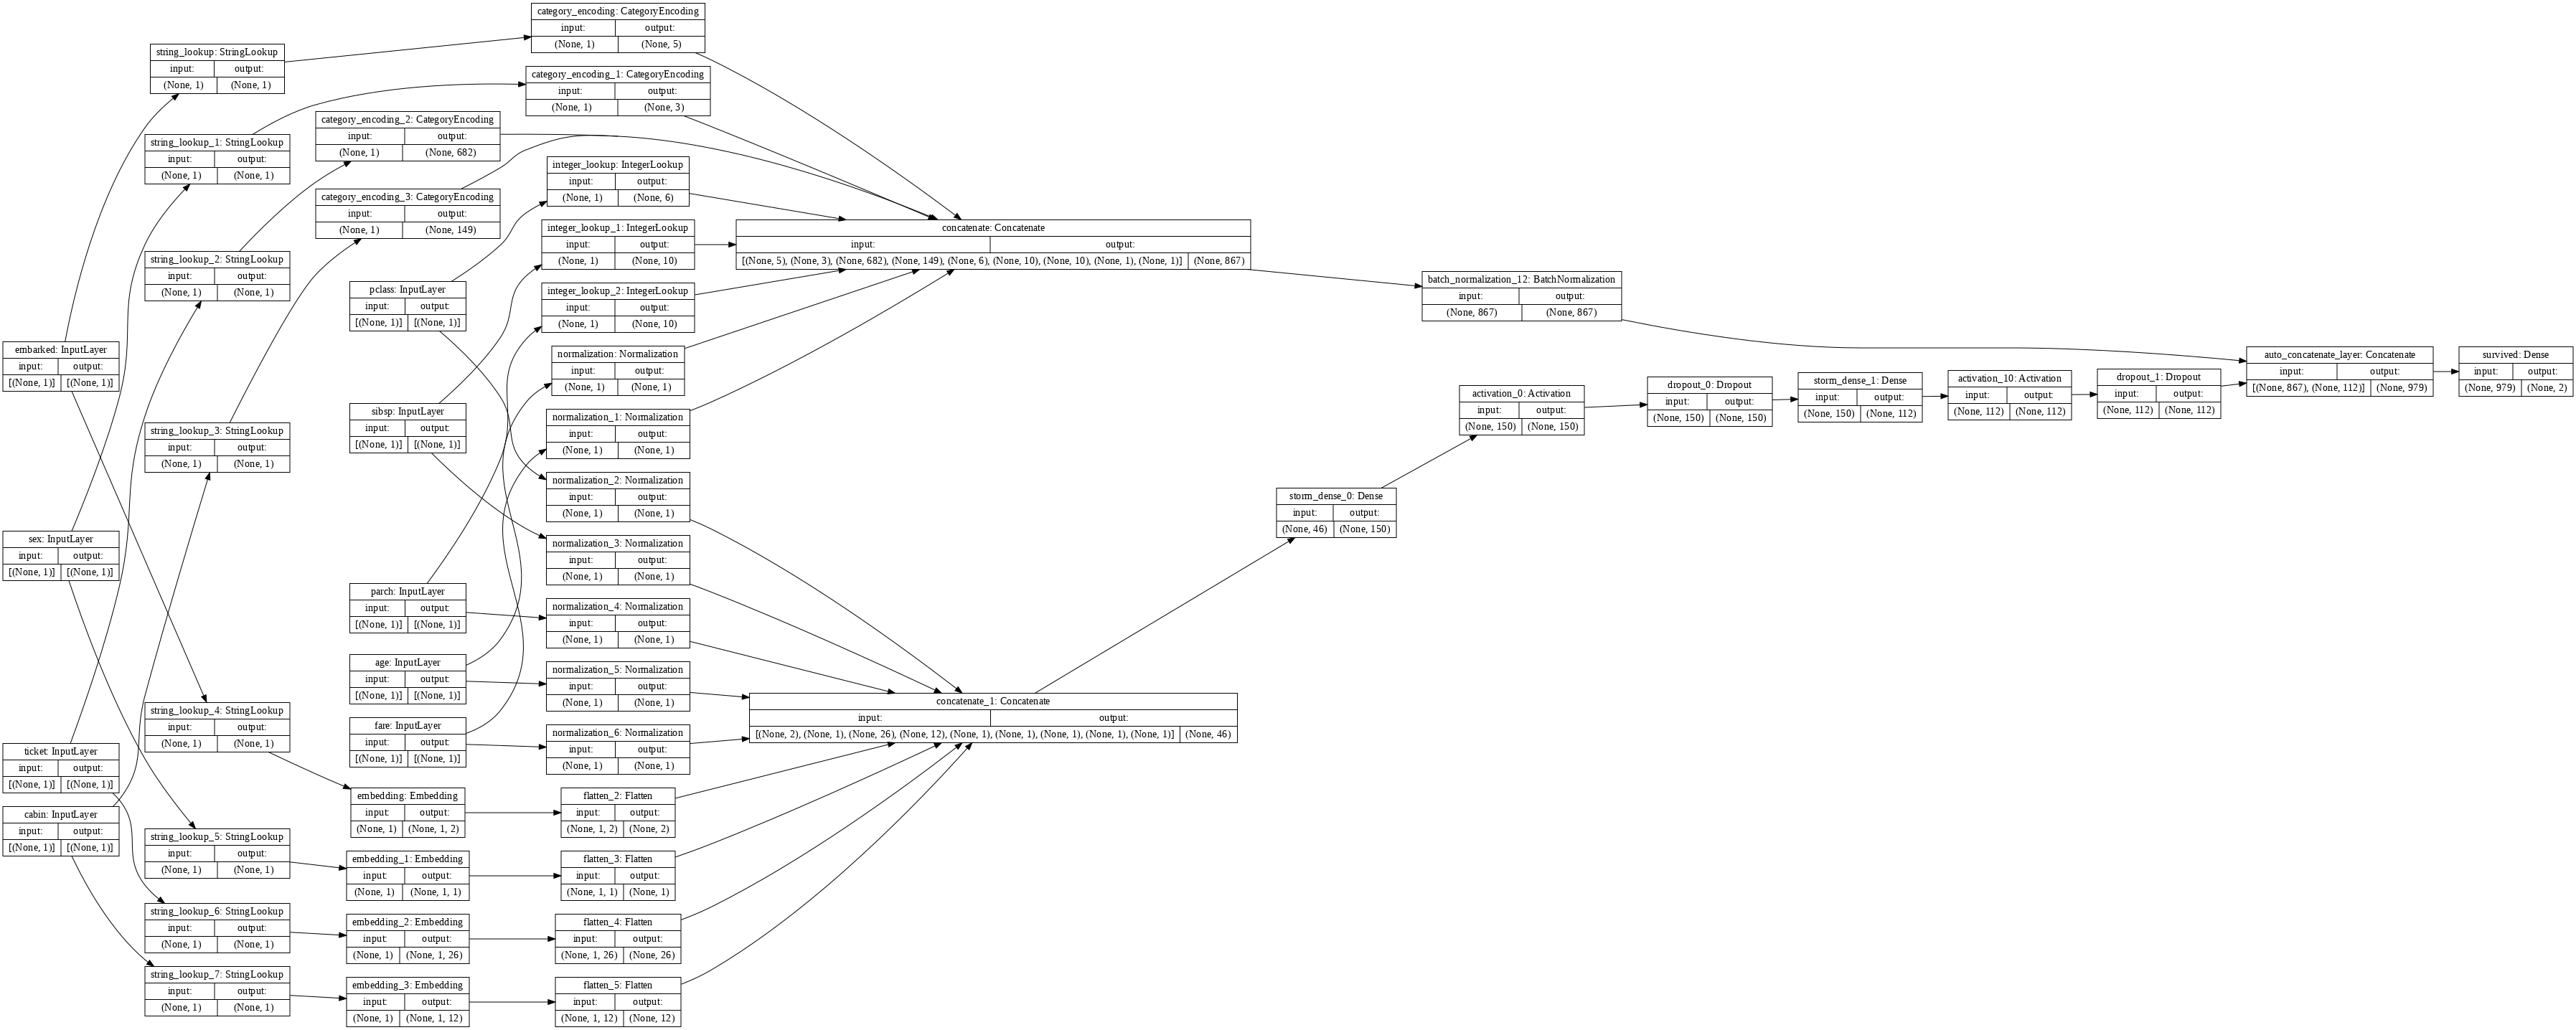

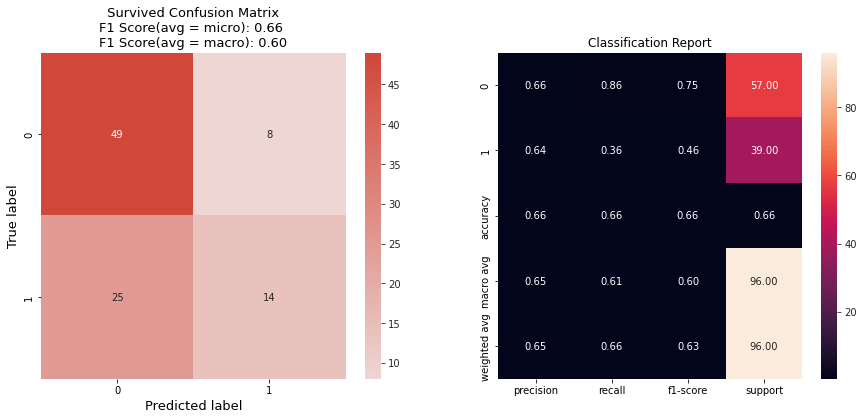

In [7]:
model, cat_vocab_dict = deepauto.fit(train_datafile, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=1)